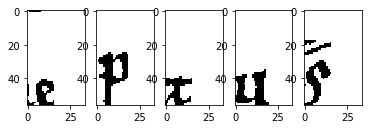

17


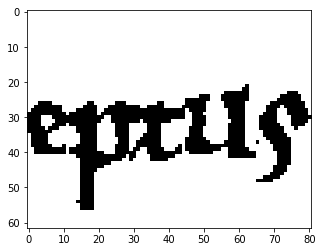

In [23]:
import matplotlib.pyplot as plt
from random import sample
import os
import numpy as np
import cv2


dataset_folder = '/home/eris/Dropbox/original_samples/'

high_chars = ["d_alta","s_alta","b","f","h","l"]
mid_chars = ["a","c","d_mediana","e","i","m","n","o","r","t","u","s_mediana"]
low_chars = ["s_bassa","g","p","q"]

characters = os.listdir(dataset_folder)
characters.remove('.dropbox')

dataset_filenames = {char: [dataset_folder+char+'/'+f for f in os.listdir(dataset_folder+char)] for char in characters}

word = 'eptus'
images = []

%matplotlib inline
plt.figure()
for i,c in enumerate(word):
    if c == 's':
        if i < len(word)-1:
            c = 's_alta'
        else:
            c = sample(['s_alta', 's_mediana', 's_bassa'], 1)[0]
    if c == 'd':
        c = sample(['d_alta', 'd_mediana'],1)[0]
        
    s = sample(dataset_filenames[c], 1)
    img = cv2.imread(s[0], cv2.IMREAD_GRAYSCALE)
    
    comp_n, labels, stats, centroids = cv2.connectedComponentsWithStats(cv2.bitwise_not(img))
    stats = sorted(stats, key=lambda s: s[4])
    
    char_x, char_y, char_w, char_h, char_a = stats[-2]
    
    images.append((c, img[char_y:char_y+char_h,char_x:char_x+char_w]))
    plt.subplot(2, len(word), i + 1)
    plt.imshow(img, cmap='gray')
plt.show()

width = np.sum([img.shape[1] for c, img in images])
height = np.max([img.shape[0] for c, img in images])*2

avg_midline = int(np.average([img.shape[0] for c, img in images if c in mid_chars]))

bottom_line = int(height*(2/3))
top_line = bottom_line - avg_midline

blank = np.ones((height, width), dtype='uint8')*255

for i,(c, image) in enumerate(images):
    start_x = int(np.sum([im.shape[1] for c, im in images[:i]]))
    end_x = start_x + image.shape[1]
    
    shift = np.random.randint(-2,3)
    
    if c in high_chars or c in mid_chars:
        start_y = bottom_line - image.shape[0] + shift
        end_y = bottom_line + shift
    else:
        start_y = top_line + shift
        end_y = top_line + image.shape[0] + shift
        
    blank[start_y:end_y,start_x:end_x] = cv2.bitwise_and(blank[start_y:end_y,start_x:end_x], image)

plt.imshow(np.asarray(blank), cmap='gray')
plt.show()
